#### 1. Import package

In [308]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

#### 2. Exploração inicial de dados.

In [309]:
# Import dataset
df = pd.read_excel('../data/raw/dados_pre_anonimizados_revisado_DFB_v2.xlsx')

In [310]:
# Colunas
print(df.columns)

# Types nas colunas
print(df.dtypes)

df.head()

Index(['id_paciente', 'idade', 'sexo', 'peso', 'altura', 'Classificação',
       'inicio', 'termino', 'ido', 'fcminima', 'fcmedia', 'fcmaxima', 'bpm1',
       'bpm2', 'bpm3', 'bpm4', 'bpm5', 'bpm6', 'bpm7', 'bpm8', 'bpm9', 'bpm10',
       'bpm11', 'bpm12', 'bpm13', 'bpm14', 'bpm15'],
      dtype='object')
id_paciente        int64
idade              int64
sexo              object
peso               int64
altura             int64
Classificação      int64
inicio            object
termino           object
ido              float64
fcminima           int64
fcmedia            int64
fcmaxima           int64
bpm1              object
bpm2              object
bpm3              object
bpm4              object
bpm5              object
bpm6              object
bpm7              object
bpm8              object
bpm9              object
bpm10             object
bpm11             object
bpm12             object
bpm13             object
bpm14             object
bpm15             object
dtype: object


,id_paciente,idade,sexo,peso,altura,Classificação,inicio,termino,ido,fcminima,...,bpm6,bpm7,bpm8,bpm9,bpm10,bpm11,bpm12,bpm13,bpm14,bpm15
0,193,49,m,90,182,1,2020-09-18 21:25:46,2020-09-19 05:43:26,12.7,42,...,69%,9%,3%,1%,0%,0%,0%,0%,0%,0%
1,193,51,m,90,182,2,2022-04-05 22:18:28,2022-04-06 03:56:20,9.1,45,...,12%,40%,39%,8%,1%,0%,0%,0%,0%,0%
2,193,51,m,90,182,3,2022-05-29 22:36:06,2022-05-30 05:55:22,7.3,42,...,68%,20%,4%,1%,0%,0%,0%,0%,0%,0%
3,221,52,f,77,170,1,2021-02-09 21:05:15,2021-02-10 05:35:19,4.6,54,...,4%,68%,25%,3%,1%,0%,0%,0%,0%,0%
4,221,52,f,77,170,2,2021-11-09 21:01:53,2021-11-10 05:05:21,6.9,52,...,5%,68%,23%,3%,1%,0%,0%,0%,0%,0%


In [311]:
# Correção de tipos

bpms = list(df.columns[-15:])

df['inicio'] = pd.to_datetime(df['inicio'], format='%Y-%m-%d %H:%M:%S')
df['termino'] = pd.to_datetime(df['termino'], format='%Y-%m-%d %H:%M:%S')
df['sexo'] = df['sexo'].astype('string')

for bpm in bpms:
    df[bpm] = df[bpm].str.replace(" ", "")
    df[bpm] = df[bpm].str.strip()
    df[bpm] = df[bpm].str.rstrip("%").astype(float)/100
    
# df.replace(0.0, np.nan, inplace=True)

print(df.dtypes)

id_paciente               int64
idade                     int64
sexo                     string
peso                      int64
altura                    int64
Classificação             int64
inicio           datetime64[ns]
termino          datetime64[ns]
ido                     float64
fcminima                  int64
fcmedia                   int64
fcmaxima                  int64
bpm1                    float64
bpm2                    float64
bpm3                    float64
bpm4                    float64
bpm5                    float64
bpm6                    float64
bpm7                    float64
bpm8                    float64
bpm9                    float64
bpm10                   float64
bpm11                   float64
bpm12                   float64
bpm13                   float64
bpm14                   float64
bpm15                   float64
dtype: object


In [312]:
print(df.isnull().sum())
df.head(10)

id_paciente      0
idade            0
sexo             0
peso             0
altura           0
Classificação    0
inicio           0
termino          0
ido              0
fcminima         0
fcmedia          0
fcmaxima         0
bpm1             0
bpm2             0
bpm3             0
bpm4             0
bpm5             0
bpm6             0
bpm7             0
bpm8             0
bpm9             0
bpm10            0
bpm11            0
bpm12            0
bpm13            0
bpm14            0
bpm15            0
dtype: int64


,id_paciente,idade,sexo,peso,altura,Classificação,inicio,termino,ido,fcminima,...,bpm6,bpm7,bpm8,bpm9,bpm10,bpm11,bpm12,bpm13,bpm14,bpm15
0,193,49,m,90,182,1,2020-09-18 21:25:46,2020-09-19 05:43:26,12.7,42,...,0.69,0.09,0.03,0.01,0.00,0.0,0.0,0.0,0.0,0.0
1,193,51,m,90,182,2,2022-04-05 22:18:28,2022-04-06 03:56:20,9.1,45,...,0.12,0.40,0.39,0.08,0.01,0.0,0.0,0.0,0.0,0.0
2,193,51,m,90,182,3,2022-05-29 22:36:06,2022-05-30 05:55:22,7.3,42,...,0.68,0.20,0.04,0.01,0.00,0.0,0.0,0.0,0.0,0.0
3,221,52,f,77,170,1,2021-02-09 21:05:15,2021-02-10 05:35:19,4.6,54,...,0.04,0.68,0.25,0.03,0.01,0.0,0.0,0.0,0.0,0.0
4,221,52,f,77,170,2,2021-11-09 21:01:53,2021-11-10 05:05:21,6.9,52,...,0.05,0.68,0.23,0.03,0.01,0.0,0.0,0.0,0.0,0.0
5,221,53,f,75,170,3,2022-11-09 20:59:21,2022-11-10 04:57:47,8.1,61,...,0.00,0.15,0.77,0.07,0.01,0.0,0.0,0.0,0.0,0.0
6,305,46,m,74,174,1,2022-02-07 22:54:37,2022-02-08 05:52:09,6.5,51,...,0.20,0.42,0.34,0.03,0.01,0.0,0.0,0.0,0.0,0.0
7,305,46,m,74,174,2,2022-04-07 22:50:43,2022-04-08 04:49:25,4.5,48,...,0.24,0.59,0.15,0.01,0.00,0.0,0.0,0.0,0.0,0.0
8,305,46,m,74,174,3,2022-05-23 23:23:09,2022-05-24 06:24:11,5.5,50,...,0.07,0.51,0.26,0.14,0.02,0.0,0.0,0.0,0.0,0.0
9,298,60,m,76,174,1,2022-04-29 23:34:06,2022-04-30 05:50:36,5.1,49,...,0.83,0.14,0.02,0.01,0.00,0.0,0.0,0.0,0.0,0.0


In [313]:
#Variables categoricas y numesicas
numerical = df.select_dtypes(include = [int, float]).keys().values
categorical = df.select_dtypes(exclude = [int, float, 'datetime']).keys().values
numerical, categorical

(array(['id_paciente', 'idade', 'peso', 'altura', 'Classificação', 'ido',
        'fcminima', 'fcmedia', 'fcmaxima', 'bpm1', 'bpm2', 'bpm3', 'bpm4',
        'bpm5', 'bpm6', 'bpm7', 'bpm8', 'bpm9', 'bpm10', 'bpm11', 'bpm12',
        'bpm13', 'bpm14', 'bpm15'], dtype=object),
 array(['sexo'], dtype=object))

#### Feature ing

In [314]:
# Calculo de IMC

# df = [df[df.columns[:-15]], df[df.columns[-15:]]]
df['imc'] = (df['peso']/((df['altura']/100)**2)).round(2)
df = df[list(df.columns[:12])+['imc']+bpms]
df2 = df[df.columns[:13]]
df2 = df2.drop(columns="Classificação")
df2

,id_paciente,idade,sexo,peso,altura,inicio,termino,ido,fcminima,fcmedia,fcmaxima,imc
0,193,49,m,90,182,2020-09-18 21:25:46,2020-09-19 05:43:26,12.7,42,53,118,27.17
1,193,51,m,90,182,2022-04-05 22:18:28,2022-04-06 03:56:20,9.1,45,69,119,27.17
2,193,51,m,90,182,2022-05-29 22:36:06,2022-05-30 05:55:22,7.3,42,57,106,27.17
3,221,52,f,77,170,2021-02-09 21:05:15,2021-02-10 05:35:19,4.6,54,67,122,26.64
4,221,52,f,77,170,2021-11-09 21:01:53,2021-11-10 05:05:21,6.9,52,67,117,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...
91,254,37,m,80,175,2020-06-07 23:11:37,2020-06-08 05:08:43,3.9,49,71,115,26.12
92,254,39,m,83,175,2021-12-07 22:12:53,2021-12-08 06:28:29,3.7,37,55,98,27.10
93,200,53,f,87,167,2021-06-17 23:28:55,2021-06-18 05:29:01,15.8,58,78,113,31.20
94,200,53,f,87,167,2021-08-10 22:03:08,2021-08-11 06:21:56,11.2,53,72,106,31.20


In [315]:
# Condicion de peso
conditions = [
              df2['imc'].between(0,17),
              df2['imc'].between(17,18.49),  
              df2['imc'].between(18.5,24.99),
              df2['imc'].between(25.0,29.99),
              df2['imc'].between(30.0,34.99),
              df2['imc'].between(35.0,39.99),
              df2['imc'].ge(40)
             ]
choices = ['muito_abaixo_peso', 'abaixo_peso', 'peso_normal', 'acima_peso', 'obesidade_i', 'obesidade_ii', 'obesidade_iii']

df2['situacao_imc'] = np.select(conditions, choices)
df2

,id_paciente,idade,sexo,peso,altura,inicio,termino,ido,fcminima,fcmedia,fcmaxima,imc,situacao_imc
0,193,49,m,90,182,2020-09-18 21:25:46,2020-09-19 05:43:26,12.7,42,53,118,27.17,acima_peso
1,193,51,m,90,182,2022-04-05 22:18:28,2022-04-06 03:56:20,9.1,45,69,119,27.17,acima_peso
2,193,51,m,90,182,2022-05-29 22:36:06,2022-05-30 05:55:22,7.3,42,57,106,27.17,acima_peso
3,221,52,f,77,170,2021-02-09 21:05:15,2021-02-10 05:35:19,4.6,54,67,122,26.64,acima_peso
4,221,52,f,77,170,2021-11-09 21:01:53,2021-11-10 05:05:21,6.9,52,67,117,26.64,acima_peso
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,254,37,m,80,175,2020-06-07 23:11:37,2020-06-08 05:08:43,3.9,49,71,115,26.12,acima_peso
92,254,39,m,83,175,2021-12-07 22:12:53,2021-12-08 06:28:29,3.7,37,55,98,27.10,acima_peso
93,200,53,f,87,167,2021-06-17 23:28:55,2021-06-18 05:29:01,15.8,58,78,113,31.20,obesidade_i
94,200,53,f,87,167,2021-08-10 22:03:08,2021-08-11 06:21:56,11.2,53,72,106,31.20,obesidade_i


In [316]:
# apneia

conditions = [
              df2['ido'].lt(5.0),
              df2['ido'].between(5.0, 14.99),  
              df2['ido'].between(15.0, 29.99),
              df2['ido'].ge(30)
             ]
choices = ['sem_apneia', 'apneia_leve', 'apneia_moderada', 'apneia_acentuada']

df2['status_apneia'] = np.select(conditions, choices)
df2

,id_paciente,idade,sexo,peso,altura,inicio,termino,ido,fcminima,fcmedia,fcmaxima,imc,situacao_imc,status_apneia
0,193,49,m,90,182,2020-09-18 21:25:46,2020-09-19 05:43:26,12.7,42,53,118,27.17,acima_peso,apneia_leve
1,193,51,m,90,182,2022-04-05 22:18:28,2022-04-06 03:56:20,9.1,45,69,119,27.17,acima_peso,apneia_leve
2,193,51,m,90,182,2022-05-29 22:36:06,2022-05-30 05:55:22,7.3,42,57,106,27.17,acima_peso,apneia_leve
3,221,52,f,77,170,2021-02-09 21:05:15,2021-02-10 05:35:19,4.6,54,67,122,26.64,acima_peso,sem_apneia
4,221,52,f,77,170,2021-11-09 21:01:53,2021-11-10 05:05:21,6.9,52,67,117,26.64,acima_peso,apneia_leve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,254,37,m,80,175,2020-06-07 23:11:37,2020-06-08 05:08:43,3.9,49,71,115,26.12,acima_peso,sem_apneia
92,254,39,m,83,175,2021-12-07 22:12:53,2021-12-08 06:28:29,3.7,37,55,98,27.10,acima_peso,sem_apneia
93,200,53,f,87,167,2021-06-17 23:28:55,2021-06-18 05:29:01,15.8,58,78,113,31.20,obesidade_i,apneia_moderada
94,200,53,f,87,167,2021-08-10 22:03:08,2021-08-11 06:21:56,11.2,53,72,106,31.20,obesidade_i,apneia_leve


In [317]:
# edade

conditions = [
              df2['idade'].between(20, 29),
              df2['idade'].between(30, 39),
              df2['idade'].between(40, 49),
              df2['idade'].between(50, 59),
              df2['idade'].ge(60)
             ]
choices = ['20-29', '30-39', '40-49', '50-59', '>60']

df2['grupo_idade'] = np.select(conditions, choices)
df2

,id_paciente,idade,sexo,peso,altura,inicio,termino,ido,fcminima,fcmedia,fcmaxima,imc,situacao_imc,status_apneia,grupo_idade
0,193,49,m,90,182,2020-09-18 21:25:46,2020-09-19 05:43:26,12.7,42,53,118,27.17,acima_peso,apneia_leve,40-49
1,193,51,m,90,182,2022-04-05 22:18:28,2022-04-06 03:56:20,9.1,45,69,119,27.17,acima_peso,apneia_leve,50-59
2,193,51,m,90,182,2022-05-29 22:36:06,2022-05-30 05:55:22,7.3,42,57,106,27.17,acima_peso,apneia_leve,50-59
3,221,52,f,77,170,2021-02-09 21:05:15,2021-02-10 05:35:19,4.6,54,67,122,26.64,acima_peso,sem_apneia,50-59
4,221,52,f,77,170,2021-11-09 21:01:53,2021-11-10 05:05:21,6.9,52,67,117,26.64,acima_peso,apneia_leve,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,254,37,m,80,175,2020-06-07 23:11:37,2020-06-08 05:08:43,3.9,49,71,115,26.12,acima_peso,sem_apneia,30-39
92,254,39,m,83,175,2021-12-07 22:12:53,2021-12-08 06:28:29,3.7,37,55,98,27.10,acima_peso,sem_apneia,30-39
93,200,53,f,87,167,2021-06-17 23:28:55,2021-06-18 05:29:01,15.8,58,78,113,31.20,obesidade_i,apneia_moderada,50-59
94,200,53,f,87,167,2021-08-10 22:03:08,2021-08-11 06:21:56,11.2,53,72,106,31.20,obesidade_i,apneia_leve,50-59


### **5. separação de datasets (baseline, primeiro exame e ultimo exame**

In [318]:
df_baseline = df2.groupby('id_paciente').first().reset_index()
df_baseline.to_csv('../data/processed/baseline.csv')
df_baseline.head()

,id_paciente,idade,sexo,peso,altura,inicio,termino,ido,fcminima,fcmedia,fcmaxima,imc,situacao_imc,status_apneia,grupo_idade
0,176,59,m,105,175,2022-02-28 23:35:48,2022-03-01 06:25:30,30.8,45,59,103,34.29,obesidade_i,apneia_acentuada,50-59
1,177,41,m,111,194,2021-01-19 00:33:38,2021-01-19 06:56:18,5.2,52,61,115,29.49,acima_peso,apneia_leve,40-49
2,193,49,m,90,182,2020-09-18 21:25:46,2020-09-19 05:43:26,12.7,42,53,118,27.17,acima_peso,apneia_leve,40-49
3,194,57,f,85,154,2022-03-07 23:07:30,2022-03-08 06:30:12,13.2,54,71,102,35.84,obesidade_ii,apneia_leve,50-59
4,195,30,m,77,175,2021-01-16 00:07:39,2021-01-16 08:28:21,2.5,45,60,112,25.14,acima_peso,sem_apneia,30-39


In [319]:
df_primeiro_exame = df2.groupby('id_paciente').nth(1).reset_index()
df_primeiro_exame.to_csv('../data/processed/primeiro_exame.csv')
df_primeiro_exame.head()

,id_paciente,idade,sexo,peso,altura,inicio,termino,ido,fcminima,fcmedia,fcmaxima,imc,situacao_imc,status_apneia,grupo_idade
0,176,59,m,105,175,2022-03-22 23:08:05,2022-03-23 06:17:51,31.7,42,56,110,34.29,obesidade_i,apneia_acentuada,50-59
1,177,41,m,111,194,2021-02-02 23:39:57,2021-02-03 06:52:36,5.3,49,58,114,29.49,acima_peso,apneia_leve,40-49
2,193,51,m,90,182,2022-04-05 22:18:28,2022-04-06 03:56:20,9.1,45,69,119,27.17,acima_peso,apneia_leve,50-59
3,194,57,f,85,154,2022-04-26 23:04:52,2022-04-27 07:02:00,15.5,55,73,126,35.84,obesidade_ii,apneia_moderada,50-59
4,195,30,m,77,175,2021-01-17 01:20:51,2021-01-17 09:29:09,2.5,42,61,126,25.14,acima_peso,sem_apneia,30-39


In [320]:
df_ultimo_exame = df2.groupby('id_paciente').last().reset_index()
df_ultimo_exame.to_csv('../data/processed/ultimo_examee.csv')
df_ultimo_exame.head()

,id_paciente,idade,sexo,peso,altura,inicio,termino,ido,fcminima,fcmedia,fcmaxima,imc,situacao_imc,status_apneia,grupo_idade
0,176,59,m,105,175,2022-06-10 23:10:56,2022-06-11 05:10:40,24.1,47,57,98,34.29,obesidade_i,apneia_moderada,50-59
1,177,42,m,111,194,2021-10-28 00:11:08,2021-10-28 06:30:20,5.6,48,57,96,29.49,acima_peso,apneia_leve,40-49
2,193,51,m,90,182,2022-05-29 22:36:06,2022-05-30 05:55:22,7.3,42,57,106,27.17,acima_peso,apneia_leve,50-59
3,194,57,f,85,154,2022-05-30 23:43:19,2022-05-31 07:08:15,5.3,56,73,99,35.84,obesidade_ii,apneia_leve,50-59
4,195,31,m,73,175,2022-01-23 00:15:18,2022-01-23 06:57:06,1.8,46,66,102,23.84,peso_normal,sem_apneia,30-39


### Graricos

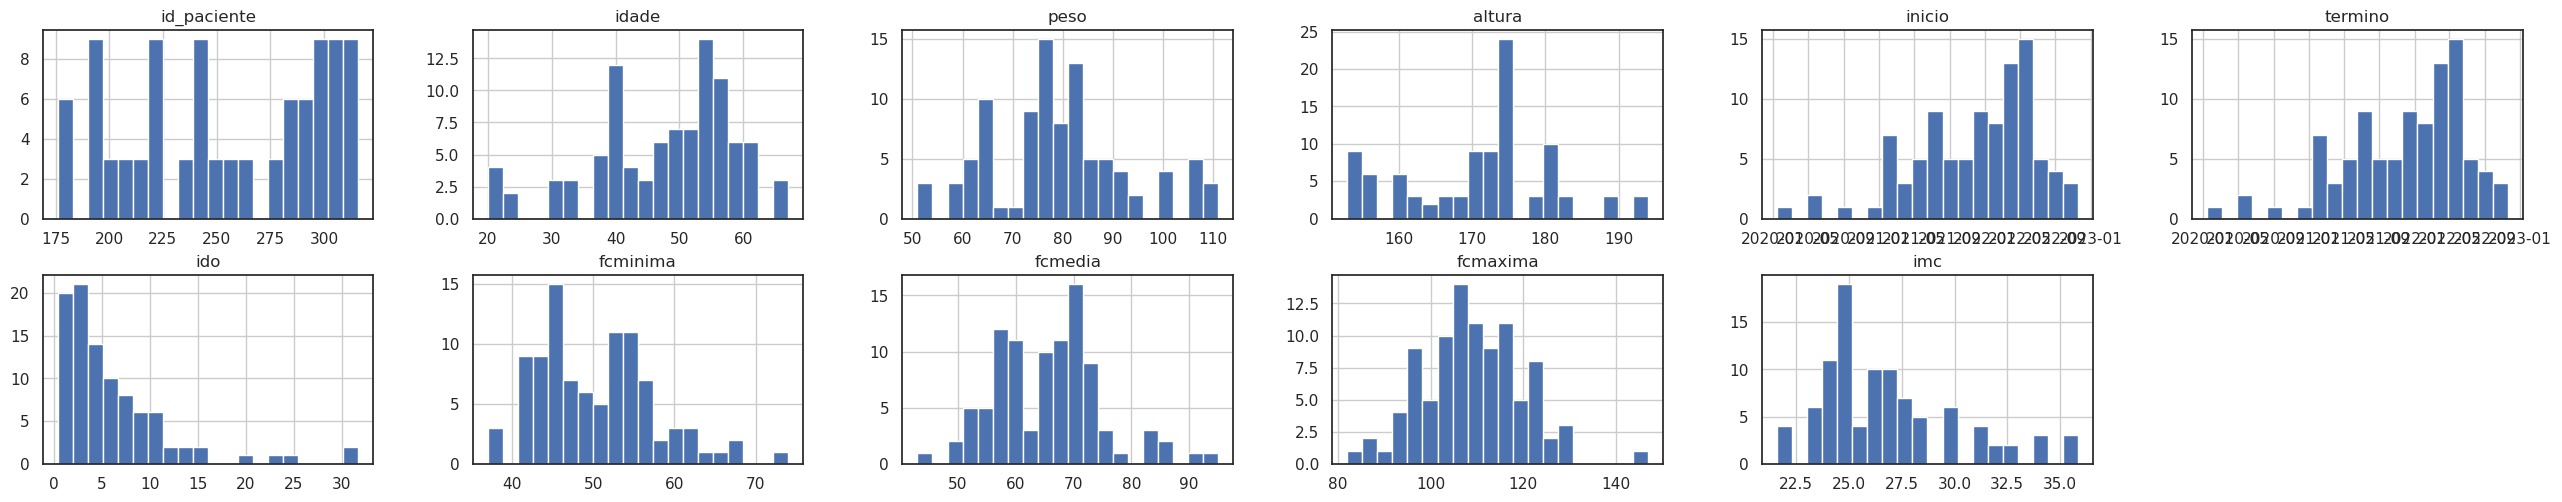

In [321]:
# histoprama geral
pd.options.plotting.backend = "matplotlib"
df2.hist(bins=20, figsize=(32, 12), layout=(4, 6))
plt.savefig("../reports/figures/histograma.png")

#### Numero de pacientes por sexo

In [487]:
pd.options.plotting.backend = "plotly"
fig = df_baseline.groupby("sexo")[["sexo"]].count()
fig = fig.plot.barh(color=fig.index)

fig.update_layout(
    title = "Numero de pacientes por sexo",
    dragmode="zoom",
    hovermode="x",
    legend=dict(orientation="h"),
    # legend = dict(traceorder="reversed"),
    template = "plotly_dark",
)

fig.update_yaxes(title = "Sexo")
fig.update_xaxes(title_text="Count")

fig.show()
fig.write_image("../reports/figures/pacientes_sexo.png")

#### Numero de pacientes por grupo idade

In [488]:
pd.options.plotting.backend = "plotly"
fig = pd.concat([df_baseline.groupby("grupo_idade")[["grupo_idade"]].count(),
                 df_primeiro_exame.groupby("grupo_idade")[["grupo_idade"]].count(),
                 df_ultimo_exame.groupby("grupo_idade")[["grupo_idade"]].count()],axis=1)

fig.columns = ["baseline","primeiro_exame","ultimo_exame"]
# fig = fig["baseline"].plot.bar(x=fig.columns, color=fig.index)
fig = fig.T
fig = px.histogram(fig, x=fig.index, y=fig.columns, barmode='group',
            #  color='smoker', barmode='group',
             height=400)

fig.update_layout(
    title = "Numero de pacientes por grupo idade",
    dragmode="zoom",
    hovermode="x",
    legend=dict(orientation="h"),
    height=600,
    # legend = dict(traceorder="reversed"),
    template = "plotly_dark",
)

# fig.update_xaxes(title = "grupo_idade")
fig.update_yaxes(title_text="Count")

fig.show()
fig.write_image("../reports/figures/pacientes_grupo_idade.png")

In [489]:
pd.options.plotting.backend = "plotly"
fig = pd.concat([df_baseline.groupby("situacao_imc")[["situacao_imc"]].count(),
                 df_primeiro_exame.groupby("situacao_imc")[["situacao_imc"]].count(),
                 df_ultimo_exame.groupby("situacao_imc")[["situacao_imc"]].count()],axis=1)

fig.columns = ["baseline","primeiro_exame","ultimo_exame"]
# print(fig)
fig = fig.T
fig = px.histogram(fig, x=fig.index, y=fig.columns, barmode='group',
            #  color='smoker', barmode='group',
             height=400)

fig.update_layout(
    title = "Situacao imc ",
    dragmode="zoom",
    hovermode="x",
    legend=dict(orientation="h"),
    height=600,
    # legend = dict(traceorder="reversed"),
    template = "plotly_dark",
)

# fig.update_xaxes(title = "grupo_idade")
fig.update_yaxes(title_text="Count")

fig.show()
fig.write_image("../reports/figures/Situacao_imc.png")

In [490]:
pd.options.plotting.backend = "plotly"
fg = pd.concat([df_baseline.groupby("status_apneia")[["status_apneia"]].count(),
                 df_primeiro_exame.groupby("status_apneia")[["status_apneia"]].count(),
                 df_ultimo_exame.groupby("status_apneia")[["status_apneia"]].count()],axis=1)

fg.columns = ["baseline","primeiro_exame","ultimo_exame"]
# print(fg)
fg = fg.T

fig = px.histogram(fg, x=fg.index, y=fg.columns, barmode='group',
             height=400)
# fig.add_scatter(x=fg.index, y=fg["apneia_acentuada"], name="apneia_acentuada",
#                 # height=400,
#                 yaxis="y2")
# fig.add_scatter(x=fg.index, y=fg["apneia_leve"], name="apneia_leve",
#                 # height=400,
#                 yaxis="y2")
# fig.add_scatter(x=fg.index, y=fg["apneia_moderada"], name="apneia_moderada",
#                 # height=400,
#                 yaxis="y2")
# fig.add_scatter(x=fg.index, y=fg["sem_apneia"], name="sem_apneia",
#                 # height=400,
#                 yaxis="y2")


fig.update_layout(
    title = "Status apneia",
    dragmode="zoom",
    hovermode="x",
    # legend = dict(traceorder="reversed"),
    template = "plotly_dark",
    legend=dict(orientation="h"),
    height=600,
    # yaxis=dict(
    #     title=dict(text="Total number of diners"),
    #     side="left",
    #     range=[0, 25],
    # ),
    
    # yaxis2=dict(
    #     title=dict(text="Total bill amount"),
    #     side="right",
    #     range=[0, 25],
    #     overlaying="y",
    #     tickmode="sync",
    # ),
)

# fig.update_xaxes(title = "grupo_idade")
fig.update_yaxes(title_text="Count")

fig.show()
fig.write_image("../reports/figures/status_apneia.png")

#### Comportamento dos diferentes tipos de apneia tendo em conta o grupo etario

In [491]:
pd.options.plotting.backend = "plotly"
df_baseline[["grupo_idade", "status_apneia"]]

fg = pd.concat([df_baseline.groupby("grupo_idade")["status_apneia"].value_counts(),
                 df_primeiro_exame.groupby("grupo_idade")["status_apneia"].value_counts(),
                 df_ultimo_exame.groupby("grupo_idade")["status_apneia"].value_counts()
                 ],axis=1)
# print(fg)
fg.columns = ["apneia_baseline","apneia_primeiro_exame","apneia_ultimo_exame"]
fg.reset_index(inplace=True)

x = [
    fg["grupo_idade"],
    fg['status_apneia'],
]

fig = go.Figure()
# fig.add_bar()
# fig.add_trace(go.Box(x=x,y=fg["apneia_baseline"], name="baseline"))
# fig.add_trace(go.Box(x=x,y=fg["apneia_primeiro_exame"], name="primeiro_exame"))
# fig.add_trace(go.Box(x=x,y=fg["apneia_ultimo_exame"], name="ultimo_exame"))
fig.add_bar(x=x,y=fg["apneia_baseline"], name="baseline")
fig.add_bar(x=x,y=fg["apneia_primeiro_exame"], name="primeiro_exame")
fig.add_bar(x=x,y=fg["apneia_ultimo_exame"], name="ultimo_exame")

fig.update_layout(
    title = "Status apneia por grupo idade",
    dragmode="zoom",
    hovermode="x",
    barmode="group",
    height=600,
    # legend = dict(traceorder="reversed"),
    template = "plotly_dark",
    # barmode = "group",
)

fig.update_xaxes(title = "Comportamento dos diferentes tipos de apneia tendo em conta o grupo_idade")
fig.update_yaxes(title_text="Count")

fig.show()
fig.write_image("../reports/figures/grupo_etario_apneia.png")

In [492]:
pd.options.plotting.backend = "plotly"

corr = df_baseline.corr(method='pearson')
fig = px.imshow(corr, text_auto=True, color_continuous_scale='RdBu_r', aspect="auto")
fig.update_layout(
    title = "Matriz de correlação do baseline",
    dragmode = "zoom",
    hovermode = "x",
    barmode = "group",
    height = 600,
    # legend = dict(traceorder="reversed"),
    template = "plotly_dark",
)

fig.show()
fig.write_image("../reports/figures/corr_mat_baseline.png")

/tmp/ipykernel_8386/1725546763.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [493]:
pd.options.plotting.backend = "plotly"

corr = df_primeiro_exame.corr(method='pearson')
fig = px.imshow(corr, text_auto=True, color_continuous_scale='RdBu_r', aspect="auto")
fig.update_layout(
    title = "Matriz de correlação do primeiro_exame",
    dragmode = "zoom",
    hovermode = "x",
    barmode = "group",
    height = 600,
    # legend = dict(traceorder="reversed"),
    template = "plotly_dark",
)

fig.show()
fig.write_image("../reports/figures/corr_mat_primeiro_exame.png")

/tmp/ipykernel_8386/3790668236.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [494]:
pd.options.plotting.backend = "plotly"

corr = df_ultimo_exame.corr(method='pearson')
fig = px.imshow(corr, text_auto=True, color_continuous_scale='RdBu_r', aspect="auto")
fig.update_layout(
    title = "Matriz de correlação do ultimo_exame",
    dragmode = "zoom",
    hovermode = "x",
    barmode = "group",
    height = 600,
    # legend = dict(traceorder="reversed"),
    template = "plotly_dark",
)

fig.show()
fig.write_image("../reports/figures/corr_mat_ultimo_exame.png")

/tmp/ipykernel_8386/2540244760.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [275]:
pd.options.plotting.backend = "plotly"

df_baseline = df_baseline.sort_values(by=["idade"])
df_primeiro_exame = df_primeiro_exame.sort_values(by=["idade"])
df_ultimo_exame = df_ultimo_exame.sort_values(by=["idade"])

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x = df_baseline["idade"],
        y = df_baseline["fcmaxima"],
        mode='lines',
        name='baseline'))
fig.add_trace(
    go.Scatter(
        x=df_primeiro_exame["idade"],
        y=df_primeiro_exame["fcmaxima"],
        mode='lines',
        name='primeiro_exame'))
fig.add_trace(
    go.Scatter(
        x=df_ultimo_exame["idade"],
        y=df_ultimo_exame["fcmaxima"],
        mode='lines',
        name='ultimo_exame'))
fig.show()

In [276]:
pd.options.plotting.backend = "plotly"

# df_baseline = df_baseline.sort_values(by=["idade"])
# df_primeiro_exame = df_primeiro_exame.sort_values(by=["idade"])
# df_ultimo_exame = df_ultimo_exame.sort_values(by=["idade"])

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x = df_baseline["idade"],
        y = df_baseline["fcmedia"],
        mode='lines',
        name='baseline'))
fig.add_trace(
    go.Scatter(
        x=df_primeiro_exame["idade"],
        y=df_primeiro_exame["fcmedia"],
        mode='lines',
        name='primeiro_exame'))
fig.add_trace(
    go.Scatter(
        x=df_ultimo_exame["idade"],
        y=df_ultimo_exame["fcmedia"],
        mode='lines',
        name='ultimo_exame'))

fig.show()

In [277]:
pd.options.plotting.backend = "plotly"

# df_baseline = df_baseline.sort_values(by=["idade"])
# df_primeiro_exame = df_primeiro_exame.sort_values(by=["idade"])
# df_ultimo_exame = df_ultimo_exame.sort_values(by=["idade"])

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x = df_baseline["idade"],
        y = df_baseline["ido"],
        mode='lines',
        name='baseline'))
fig.add_trace(
    go.Scatter(
        x=df_primeiro_exame["idade"],
        y=df_primeiro_exame["ido"],
        mode='lines',
        name='primeiro_exame'))
fig.add_trace(
    go.Scatter(
        x=df_ultimo_exame["idade"],
        y=df_ultimo_exame["ido"],
        mode='lines',
        name='ultimo_exame'))

fig.show()

#### Pergunta:
São necesarias tudas as colunas?

In [8]:
df['id_paciente'].unique()

array([244, 192, 247, 210, 196, 193, 297, 304, 310, 252, 221, 305, 280,
       215, 268, 216, 198, 240, 167, 287, 259, 298, 261, 211, 276, 199,
       213, 284, 242, 181, 204, 316, 214, 256, 227, 313, 299, 169, 174,
       312, 245, 255, 293, 188, 222, 248, 314, 302, 230, 295, 282, 239,
       225, 218, 307, 212, 292, 197, 285, 272, 209, 170, 322, 325, 233,
       232, 163, 208, 264, 275, 286, 183, 246, 226, 289, 185, 168, 234,
       279, 320, 311, 249, 303, 165, 190, 236, 291, 162, 171, 219, 315,
       260, 224, 274, 294, 166, 250, 238, 206, 223, 309, 323, 273, 253,
       262, 271, 296, 319, 231, 229, 318, 164, 194, 263, 277, 173, 235,
       220, 258, 321, 203, 176, 308, 283, 290, 254, 177, 179, 270, 317,
       281, 266, 306, 217, 180, 205, 257, 288, 324, 202, 243, 178, 301,
       182, 187, 200, 251, 300, 278, 184, 195, 241, 191, 237, 228, 269,
       201, 172, 207, 265, 175])

In [9]:
columns = list(df.keys())
for i in bpms:
    columns.remove(i)
columns

['id_paciente',
 'idade',
 'sexo',
 'peso',
 'altura',
 'Sequencia_exame',
 'data_inicio',
 'data_termino',
 'ido',
 'fcminima',
 'fcmedia',
 'fcmaxima']

In [23]:
pd.options.plotting.backend = "plotly"

# fig = px.histogram(df, x="ido", y="idade", color="sexo", marginal="box", hover_data=df.columns)
fig = px.histogram(df, x="ido", color="sexo", marginal="box", hover_data=df.columns)

fig.show()

fig = px.histogram(df, x="ido", y="peso", color="sexo", marginal="box", hover_data=df.columns)
fig.show()

fig = px.histogram(df, x="ido", y="altura", color="sexo", marginal="box", hover_data=df.columns)
fig.show()

In [21]:
np.random.randn(200)

array([-8.17621515e-01,  1.52503630e+00, -8.13274520e-01, -4.65650651e-02,
        8.92064353e-01,  1.97609429e+00, -1.34564947e+00, -8.14083762e-01,
        3.87796992e-01,  5.91401961e-02,  1.68933407e+00, -1.36968517e+00,
        1.00748730e+00,  1.19778666e+00,  1.86565281e+00,  1.05985023e-01,
        1.20701764e+00, -1.67955654e+00, -2.25666920e-01,  3.70747808e-01,
       -2.40181431e-01,  1.77695308e-01, -1.61673130e-01,  1.20037087e+00,
        3.91040209e-01,  2.90781720e-01, -2.23128489e+00, -2.79240152e-01,
        5.39118204e-01, -1.08769155e+00, -5.53055022e-01, -5.21885705e-02,
        8.34980260e-01,  1.04680081e+00, -6.66781060e-01,  6.62246507e-01,
        1.50394689e+00, -6.44720549e-01, -6.35411520e-01, -4.13574350e-02,
        4.58508422e-01,  2.25574264e-01, -1.47504055e-02,  2.27014110e-01,
        4.54705301e-01, -8.30053319e-01, -4.07575860e-01, -1.54020597e+00,
       -9.43042050e-01, -1.15160466e+00,  1.57743637e+00,  4.85219969e-01,
        7.74129089e-01, -

In [103]:
px.data.tips()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
